## Import Packages

In [1]:
import os
import sys
import numpy as np
import errno

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import pandas as pd
import random as rn
from itertools import cycle
import time
from collections import OrderedDict

In [2]:
from looti import emulatorpaths as epath

#from looti  import tools as too
from looti  import interpolators as itp

from looti import dataplotters as dtp

from looti import dictlearn as dcl

from looti import datahandle as dhl

#sns.set()

In [3]:
from looti import read_file as rf

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run Parameters

## Import Data

The user must provide the folder where the data are stored : Datafolder.
It is expected that inside this folder, the data are organised in the following way :
- One folder per parameters
- These folders must contain the names/abreviations and values of the parameters used within its name.  
- The parameters'names must be seperated by a character e.g : _ , -- , ;
- Each of these folders contains files where is stored the matter power spectrum or ratio at given redshifts.
- The name of these files should contains the snapshot/redshift

Considering the following path as an exemple : MassiveNus/mnv0.00000_om0.30000_As2.1000/powerspec_tot_034.txt
- Datafolder is MassiveNus
- Parameters names are mnv,om,As and they are separated by : " _ " 
- The folder mnv0.00000_om0.30000_As2.1000 contains the power matter spetrum for these parameters for different redshift e.g powerspec_tot_034.txt for snapshot "034"



Indicate the name path of the datafolder :

# Read the parameters names and seperation

The following function will read the first file within the datafolder. It will assume that this file is a relevant example. As explained above this file should contains the name of the parameters seperated by a character and the values of the parameters.

The function will asks the user to provide the names of the parameters and the seperations used. 

#  Construct the frame 

The following function will construct the dataframe.
If the function ask_param has been runned the user should only change the following parameters :
- feature_filename : the begining of the files'name containing the values of matter power spectrum/ratio
- filename_format : the format of the files'name containing the values of matter power spectrum/ratio
- grid_pos : the column which contains the grid, e.g, grid_pos=0 would assume that the grid corresponds to the first column
- feature_pos=1 : the column which contains matter power spectrum/ratio, e.g feature_pos=1 would assume that the features are in the second column.


In [19]:
### The parameters that the user should change :
feature_filename="ratio_" ### Beginning of the files'names containing the features
filename_format="ps"  #extension of the files 
grid_pos=0 # column corresponding to the grid
feature_pos=1 # column corresponding to the features

In [44]:
import yaml
with open(r'../fr_config.yaml') as file:
    doc = yaml.load(file, Loader=yaml.FullLoader)
doc
#yaml.load("../config_read.yaml", Loader=yaml.FullLoader)

{'datafolder': '../../optimaltransport/raw_pofk/ELEPHANT/ratio_fofr_gr/',
 'feature_filename': 'ratio_',
 'filename_format': 'ps',
 'LCDM_mode': False,
 'LCDM_folder': 'None',
 'use_reference': True,
 'reference_folder': 'mnv0.00000_om0.30000_As2.1000',
 'grid_pos': 0,
 'feature_pos': 1,
 'param_str_array': ['F'],
 'sep_param': '_',
 'sep_param_value': None,
 'starting_row': 0,
 'end_row': None,
 'redshift_digit': 3,
 'redshift_in_header': True}

In [45]:
doc["redshift_in_header"]

True

In [46]:
####Run to construct the database
from looti import read_file as rf
framework=rf.Frame_Constructor(path_config_file = "../fr_config.yaml")
data = framework.create_DataFrame()
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#data_frame=rf.create_DataFrame(datafolder,["F"], "_", None,
                     #feature_filename=feature_filename, filename_format=filename_format,                     
                    # grid_pos=grid_pos, feature_pos=feature_pos)

ratio_F1E5_low_sigma8_09.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_19.ps <class 'NotADirectoryError'>
ratio_F5.5_04.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_29.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_38.ps <class 'NotADirectoryError'>
ratio_F5.5_05.ps <class 'NotADirectoryError'>
.DS_Store <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_28.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_08.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_18.ps <class 'NotADirectoryError'>
ratio_F1E5_high_sigma8_11.ps <class 'NotADirectoryError'>
ratio_F1E5_high_sigma8_25.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_03.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_37.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_27.ps <class 'NotADirectoryError'>
ratio_F1E5_low_sigma8_13.ps <class 'NotADirectoryError'>
ratio_F1E5_high_sigma8_35.ps <class 'NotADirectoryError'>
ratio_F1E5_high_sigma8_21.ps <class 'NotADirectoryError'>
ratio_F1E5

In [29]:
ls ../

DL_MassiveNus.csv                  data/
DL_crossvalidation_MassiveNus      develop.sh*
DL_crossvalidation_MassiveNus.csv  dist/
Dockerfile                         interpolating_objects/
MassiveNus_validation_script.py*   looti/
README.md                          looti.egg-info/
build/                             notebooks/
config_read.yaml                   setup.py


In [164]:
data.loc['theo', '38']

/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


0        1        2        3        4    \
parameter_1 parameter_1_value                                                
F           10000000.0               1        1        1        1        1   
            5000000.0          1.00033  1.00357  1.00792  1.01169  1.01455   
            1000000.0                1  1.01894  1.03914  1.05284  1.06474   
            500000.0           1.00607  1.04705  1.08036  1.10232  1.11865   
            10000.0             1.0589  1.20217  1.26967  1.32152  1.36246   
            100000.0                 1  1.09391  1.15323  1.19752   1.2407   
            200000.0                 1   1.0576  1.10266  1.13235   1.1603   

                                   5        6        7        8        9    \
parameter_1 parameter_1_value                                                
F           10000000.0               1        1        1        1        1   
            5000000.0           1.0166  1.01814  1.01923  1.02017  1.02089   
            1000000.0          1.07259  1.07824   1.0863  1.08868  1.09346   
            500000.0           1.13039  1.13971  1.14772  1.15381  1.15938   
            10000.0            1.39135  1.41306  1.42927  1.43687  1.44061   
            100000.0           1.27289  1.30213  1.32927  1.34335  1.35931   
            200000.0           1.18189  1.19943  1.21798  1.22544  1.23717   

                               ...      150      151      152      153  \
parameter_1 parameter_1_value  ...                                       
F           10000000.0         ...        1        1        1        1   
            5000000.0          ...  1.03931  1.03915  1.03855  1.03814   
            1000000.0          ...  1.19529  1.19622  1.19715  1.19594   
            500000.0           ...  1.22497  1.22382  1.22302  1.22248   
            10000.0            ...   1.2873  1.28768  1.28703  1.28619   
            100000.0           ...  1.33243  1.33021    1.328  1.32611   
            200000.0           ...  1.32897  1.32522  1.32148  1.32801   

                                   154      155      156      157      158  \
parameter_1 parameter_1_value                                                
F           10000000.0               1        1        1        1        1   
            5000000.0           1.0381  1.03818  1.03794   1.0381  1.03834   
            1000000.0          1.19417  1.19239  1.19033  1.18798  1.18562   
            500000.0           1.22201  1.22102  1.22092  1.22075  1.22039   
            10000.0            1.28561  1.28583  1.28501  1.28515  1.28574   
            100000.0           1.32431   1.3225  1.32373  1.32834  1.33295   
            200000.0           1.33725  1.34648  1.34819  1.34152  1.33484   

                                   159  
parameter_1 parameter_1_value           
F           10000000.0               1  
            5000000.0          1.03809  
            1000000.0          1.18434  
            500000.0           1.21986  
            10000.0            1.28557  
            100000.0             1.336  
            200000.0           1.33047  

[7 rows x 160 columns]

In [165]:
for x,i in enumerate( data.loc['theo', '38'].values):
    print(np.log10(data.loc['theo', '38'].index[x][1]))

7.0
6.698970004336019
6.0
5.698970004336019
4.0
5.0
5.301029995663981


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceW

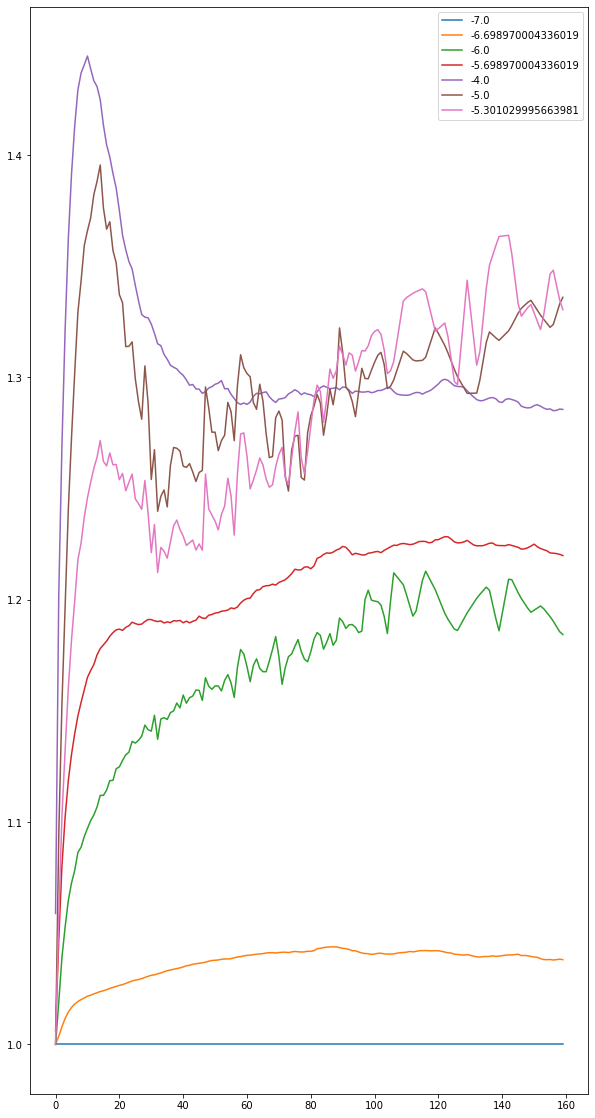

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
for x,i in enumerate( data.loc['theo', '38'].values):
    
    plt.plot(i,label =-np.log10(data.loc['theo', '38'].index[x][1]))
    plt.legend()

In [151]:
def transform_F_R(x):
    return np.concatenate((np.log10(np.power(x[:len(x)-1],-1)),[x[-1]]))

In [175]:
data_frame = rf.transform_index(data,3,transform_F_R)

In [176]:
data

0         1    \
noise_model redshift parameter_1 parameter_1_value                         
theo        38       F           -7.0                        1         1   
            28       F           -7.0                        1         1   
            08       F           -7.0                        1         1   
            18       F           -7.0                        1         1   
            09       F           -7.0                        1         1   
...                                                        ...       ...   
            21       F           -5.301029995663981          1   1.02029   
            35       F           -5.301029995663981          1   1.05218   
            25       F           -5.301029995663981          1   1.02858   
            11       F           -5.301029995663981          1   1.00505   
k_grid                                               0.0314159  0.107165   

                                                          2         3    \
noise_model redshift parameter_1 parameter_1_value                        
theo        38       F           -7.0                       1         1   
            28       F           -7.0                       1         1   
            08       F           -7.0                       1         1   
            18       F           -7.0                       1         1   
            09       F           -7.0                       1         1   
...                                                       ...       ...   
            21       F           -5.301029995663981   1.04331   1.06305   
            35       F           -5.301029995663981   1.09513   1.12448   
            25       F           -5.301029995663981   1.05798   1.08128   
            11       F           -5.301029995663981   1.01187   1.02036   
k_grid                                               0.182914  0.258663   

                                                          4         5    \
noise_model redshift parameter_1 parameter_1_value                        
theo        38       F           -7.0                       1         1   
            28       F           -7.0                       1         1   
            08       F           -7.0                       1         1   
            18       F           -7.0                       1         1   
            09       F           -7.0                       1         1   
...                                                       ...       ...   
            21       F           -5.301029995663981   1.07942   1.09446   
            35       F           -5.301029995663981   1.15065   1.17138   
            25       F           -5.301029995663981   1.09981   1.11701   
            11       F           -5.301029995663981   1.02975   1.03823   
k_grid                                               0.334412  0.410161   

                                                         6         7    \
noise_model redshift parameter_1 parameter_1_value                       
theo        38       F           -7.0                      1         1   
            28       F           -7.0                      1         1   
            08       F           -7.0                      1         1   
            18       F           -7.0                      1         1   
            09       F           -7.0                      1         1   
...                                                      ...       ...   
            21       F           -5.301029995663981  1.10615   1.11627   
            35       F           -5.301029995663981   1.1897   1.20534   
            25       F           -5.301029995663981  1.13164   1.14391   
            11       F           -5.301029995663981   1.0455   1.05205   
k_grid                                               0.48591  0.561659   

                                                          8         9    ...  \
noise_model redshift parameter_1 parameter_1_value                       ..

In [177]:
data.to_csv("F_R_ratios.csv")

In [173]:
ls ../notebooks/

DL_MassiveNus.csv                  data/
DL_crossvalidation_MassiveNus      develop.sh*
DL_crossvalidation_MassiveNus.csv  dist/
Dockerfile                         interpolating_objects/
MassiveNus_validation_script.py*   looti/
README.md                          looti.egg-info/
build/                             notebooks/
config_read.yaml                   setup.py


In [174]:
emulation_data = dhl.DataHandle( "ratios_fr", "../notebooks/",ratio_mode = True, 
                                  num_parameters=1,
                               multindex_cols_ext=[0,1,2,3])

emulation_data.read_csv_pandas(verbosity=2)

FileNotFoundError: [Errno 2] No such file or directory: '../notebooks/ratios_fr.csv'

In [15]:
emulation_data.df_ext

0         1  \
noise_model redshift parameter_1 parameter_1_value                       
theo        38.0     F           -7.00000           1.000000  1.000000   
            28.0     F           -7.00000           1.000000  1.000000   
            8.0      F           -7.00000           1.000000  1.000000   
            18.0     F           -7.00000           1.000000  1.000000   
            9.0      F           -7.00000           1.000000  1.000000   
...                                                      ...       ...   
            21.0     F           -5.30103           1.000000  1.020285   
            35.0     F           -5.30103           1.000000  1.052180   
            25.0     F           -5.30103           1.000000  1.028580   
            11.0     F           -5.30103           1.000000  1.005050   
k_grid      NaN      NaN         NaN                0.031416  0.107165   

                                                           2         3  \
noise_model redshift parameter_1 parameter_1_value                       
theo        38.0     F           -7.00000           1.000000  1.000000   
            28.0     F           -7.00000           1.000000  1.000000   
            8.0      F           -7.00000           1.000000  1.000000   
            18.0     F           -7.00000           1.000000  1.000000   
            9.0      F           -7.00000           1.000000  1.000000   
...                                                      ...       ...   
            21.0     F           -5.30103           1.043307  1.063054   
            35.0     F           -5.30103           1.095132  1.124479   
            25.0     F           -5.30103           1.057975  1.081285   
            11.0     F           -5.30103           1.011869  1.020363   
k_grid      NaN      NaN         NaN                0.182914  0.258663   

                                                           4         5  \
noise_model redshift parameter_1 parameter_1_value                       
theo        38.0     F           -7.00000           1.000000  1.000000   
            28.0     F           -7.00000           1.000000  1.000000   
            8.0      F           -7.00000           1.000000  1.000000   
            18.0     F           -7.00000           1.000000  1.000000   
            9.0      F           -7.00000           1.000000  1.000000   
...                                                      ...       ...   
            21.0     F           -5.30103           1.079416  1.094462   
            35.0     F           -5.30103           1.150651  1.171377   
            25.0     F           -5.30103           1.099813  1.117006   
            11.0     F           -5.30103           1.029748  1.038229   
k_grid      NaN      NaN         NaN                0.334412  0.410161   

                                                           6         7  \
noise_model redshift parameter_1 parameter_1_value                       
theo        38.0     F           -7.00000           1.000000  1.000000   
            28.0     F           -7.00000           1.000000  1.000000   
            8.0      F           -7.00000           1.000000  1.000000   
            18.0     F           -7.00000           1.000000  1.000000   
            9.0      F           -7.00000           1.000000  1.000000   
...                                                      ...       ...   
            21.0     F           -5.30103           1.106150  1.116271   
            35.0     F           -5.30103           1.189696  1.205337   
            25.0     F           -5.30103           1.131640  1.143912   
            11.0     F           -5.30103           1.045504  1.052055   
k_grid      NaN      NaN         NaN                0.485910  0.561659   

                                                           8         9  ...  \
noise_model redshift parameter_1 parameter_1_value                      ...   
theo        38.0     F           -7.00000        

In [16]:
emulation_data.z_names

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 23.0,
 23.0,
 23.0,
 23.0,

In [17]:
emulation_data.calculate_ratio_data(2.)

In [21]:
np.concatenate.emulation_data.extparam1_vals

array([-7.     , -6.69897, -6.     , -5.69897, -5.30103, -5.     ,
       -4.     ])

In [27]:
emulation_data.matrix_ratios_dict["theo"][]

(7, 160)